# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 4 Introduction to Linear Regression Models

Thursday Lab: 8/27/2020 3:15 pm - 4:30 pm

Friday Lab: 8/28/2020 9:25 am - 10:40 am 

## Outline

1) Warm-up: syntax and exploratory analysis

2) built in regression function

3) identify attributes and methods within class

4) build a regression model 


## Introduction (10 minutes)

This weeks lab we will be having fun with regression. Lets start by creating our own array. 

```python
import numpy as np
from sklearn import linear_model

x = np.array([6, 9, 12, 19, 20, 29]).reshape((-1,1))
y = np.array([6, 10, 15, 16, 25, 35])

my_reg_mdl = linear_model.LinearRegression() 
my_reg_mdl.fit(x,y)
```

Here the .fit() will calculate the intercept and slope, which are attributes to the class. They can be called like so:

```python
print('intercept', linear_model.intercept_)
print('slope', linear_model.coef_) 
```

How do we know to use .intercept\_  and .coef\_  ? 


Lets take a look at the scikit learn manual page for linear regression: [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Lets take a few minutes to discuss this resource, and determine what information we can get from it. 


Now that we know how to fit a linear model given an array of responses and an array of observation the next step would be to make predictions using new observations. 

```python
    prediction = my_reg_mdl.predict(x_new)
```

Discuss if we had more than one column of data. 

```python
x = np.array([[6, 9, 12, 19, 20, 29], [8, 1, 2, 19, 25, 40]]).reshape((-1,2))
```


In [44]:
# Introduction

import numpy as np
from sklearn import linear_model
# -1.176962378077107
x = np.array([[6, 9, 12, 19, 20, 29], [8, 1, 2, 19, 25, 40]]).reshape((-1,2))
#y = np.array([6, 10, 15, 16, 25, 35]).reshape((-1,1))
#x = np.array([6, 9, 12, 19, 20, 29]).reshape((-1,1))
y = np.array([6, 10, 15, 16, 25, 35])
my_reg_mdl = linear_model.LinearRegression() 


my_reg_mdl.fit(x,y)
#my_reg_mdl.intercept_


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Task 1: Fetch and explore the data-set (10 minutes)

Download the Weather.csv file from the Lab 4 folder in Canvas. 

I think it is best practice to assign a variable to your local path to avoid hard coding a location within a function itself. From Lab 3 and homework 3 we should have a way to use python to get your path such that you only need to supply a filename provided your notebook and data are in the same location. Feel free to use what you have previouly created. 

```python
    path = 'the/path/to/the/file/on/your/computer'
```

Now lets use pandas to  open and explore the .csv file. 

```python
    import pandas as pd
    my_dataset = pd.read_csv(path)
```

We now have a dataframe called my\_dataset and we can use the methods within pandas to explore our data.

```python
    my_dataset.shape #gives a tuple of the array size
    my_dataset.describe() #provides descriptive statistics of the dataset 
```

Now lets visualize the dataset.

```python
import matplotlib.pyplot as plt

my_dataset.plot(x='MinTemp', y='MaxTemp', style='x')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()
```

Use the seaborn [seaborn](https://seaborn.pydata.org/index.html) package to explore the distribution of the data.

```python
    import seaborn as sb
    sb.distplot(dataset['MaxTemp'])
```

Discuss what this plot as a group. Repeat the same for the minimum and average temperatures. What are their ranges? 

In [43]:
my_dataset.shape
my_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


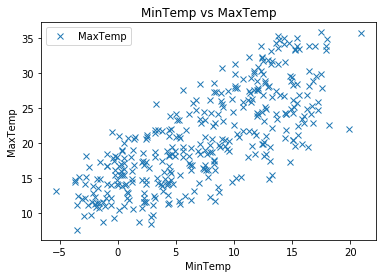

/Users/tbalson/.pyenv/versions/3.6.4/envs/ENV3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/tbalson/.pyenv/versions/3.6.4/envs/ENV3/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/tbalson/.pyenv/versions/3.6.4/envs/ENV3/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


array([24.3, 26.9, 23.4, 15.5, 16.1, 16.9, 18.2, 17. , 19.5, 22.8, 25.2,
       27.3, 27.9, 30.9, 31.2, 32.1, 31.2, 30. , 32.3, 33.4, 33.4, 19.4,
       18.5, 24.3, 28.4, 26.9, 22.2, 28. , 24.3, 24.1, 20.4, 26.3, 24.2,
       26.5, 21.8, 26.8, 25.8, 28.2, 29.4, 24.8, 18.5, 21.5, 20.3, 27.1,
       29.9, 21.1, 21.7, 20.9, 21. , 23.1, 29.5, 22. , 20.4, 24.4, 21.7,
       26.3, 26.7, 28.3, 31.6, 35. , 33.5, 34.2, 35. , 23.4, 25.3, 27.5,
       34.1, 33.9, 30.3, 29.9, 34.2, 35.8, 35.7, 33.8, 22.8, 33.8, 33.2,
       25.1, 20.4, 19.6, 24.7, 19.9, 22.5, 24.4, 27.8, 25.7, 28.8, 31.3,
       33.2, 33.9, 34.9, 27.8, 23.8, 28.8, 29.6, 22.6, 22.8, 27.4, 24.2,
       19.9, 20.9, 23.1, 26. , 24.2, 18.2, 24.2, 25.2, 26.1, 24.1, 25.8,
       27.1, 28.9, 24.8, 28.6, 25.1, 23.8, 25.9, 28.2, 27.6, 17.3, 18.4,
       21.8, 24.4, 27.3, 28.2, 27.6, 31.8, 29.2, 27.4, 27.8, 31.7, 34.7,
       31.7, 33.1, 33.8, 35.2, 32.3, 30.2, 29.9, 26.2, 29.3, 14.8, 19.6,
       24.9, 22.4, 17.4, 20.2, 18.3, 18.2, 18.5, 18

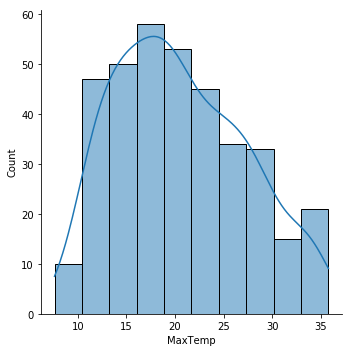

In [48]:
# Task 1
import os 
import pandas as pd
import numpy as np

def get_path(filename):
    #filename = "/weather.csv"
    my_dir = os.getcwd()
    file_path = my_dir + filename
    return file_path

# Explore the data with desctiptive stats

path = get_path("/weather.csv")
my_dataset = pd.read_csv(path)
my_dataset.shape
my_dataset.describe()

# Explore the data with visuals 

import matplotlib.pyplot as plt
max_t = my_dataset['MaxTemp']
test = np.array(test)
my_dataset.plot(x='MinTemp', y='MaxTemp', style='x')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

# add a very non linear figure for discussion.

import seaborn as sb
sb.displot(my_dataset['MaxTemp'],kde=True)
#sb.displot(test,kde=True)
test

## Task 2: Build a linear regression model (25 minutes)

Use the minimum temperature as your x and the maximum temperature as your y as shown below. Make sure you split the data into 80\% training data and 20\% testing using train\_test\_fit. Choose a way to visualize the predicted versus actual values and showcase this.  

```python    
x = my_dataset['MinTemp'].values.reshape(-1,1)
    y = my_dataset['MaxTemp'].values.reshape(-1,1)
```


1) Make sure you split the data into 80\% training data and 20\% testing using train\_test\_fit.

2) Train the algorithm

3) use x\_test to predict values of y

4) Visualize the predicted values versus actual values in a meaningful way (lets have students showcase this)


In [49]:
# Task 2
x = my_dataset['MinTemp'].values.reshape(-1,1)
y = my_dataset['MaxTemp'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
split = 0.2 ; 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=0) # part 1

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
my_mdl = lin_reg.fit(x_train,y_train)

#To retrieve the intercept:
print(my_mdl.intercept_)
#For retrieving the slope:
print(my_mdl.coef_)

my_pred = lin_reg.predict(x_test)

testdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': my_pred.flatten()})
testdf


[14.56202411]
[[0.81953755]]


,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


## Task 3: Repeat Task 2 with a new dataset from kaggle  (15 minutes)

[kaggle](https://www.kaggle.com/search?q=tag%3A%22linear+regression%22+in%3Adatasets) is an excellent resource for datasets. Go download one and identify two variables you can use to build a regression model from and train a model to those variables. 


In [ ]:
# Task 3

## Task 4: Did we build a good model? (5 minutes)

Implement an error function to determine the errors between your predictions and observations. 

In [14]:
# Task 4
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, my_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, my_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, my_pred)))

Mean Absolute Error: 4.213513513513513
Mean Squared Error: 25.958648648648648
Root Mean Squared Error: 5.09496306646561
